In [1]:

import pandas
from dash import Dash, html, dcc
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates
import numpy as np
import os

os.getcwd()

In [56]:
###### PIPELINE#####

###loading data###   
data = pd.read_csv('data/AirPollutionSeoul/Measurement_summary.csv')
#data.to_csv("data/AirPollutionSeoul/Measurement_summary_save.csv", index=False)
data.head(10)

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.051,0.002,1.2,69.0,61.0
5,2017-01-01 05:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.046,0.002,1.1,70.0,61.0
6,2017-01-01 06:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.049,0.002,1.1,66.0,57.0
7,2017-01-01 07:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.045,0.002,1.0,71.0,60.0
8,2017-01-01 08:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.047,0.002,1.1,72.0,60.0
9,2017-01-01 09:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.047,0.002,1.1,74.0,63.0


In [60]:
#### Data preparation and exploration####
# separate date and time from measurement date features
data_prepared = data['Measurement date'].str.split(" ")
dates = data_prepared.map(lambda x: x[0])
times = data_prepared.map(lambda x: x[1])
#print(dtt, type(dtt))
#print(times[0:10])
data_prepared= pd.DataFrame({'Date':dates, 'Time':times},  columns=['Date', 'Time'])

data['Date']= data_prepared['Date']
data['Time']= data_prepared['Time']
data[0:2]

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5,Date,Time
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.059,0.002,1.2,73.0,57.0,2017-01-01,00:00
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.058,0.002,1.2,71.0,59.0,2017-01-01,01:00


6256.0


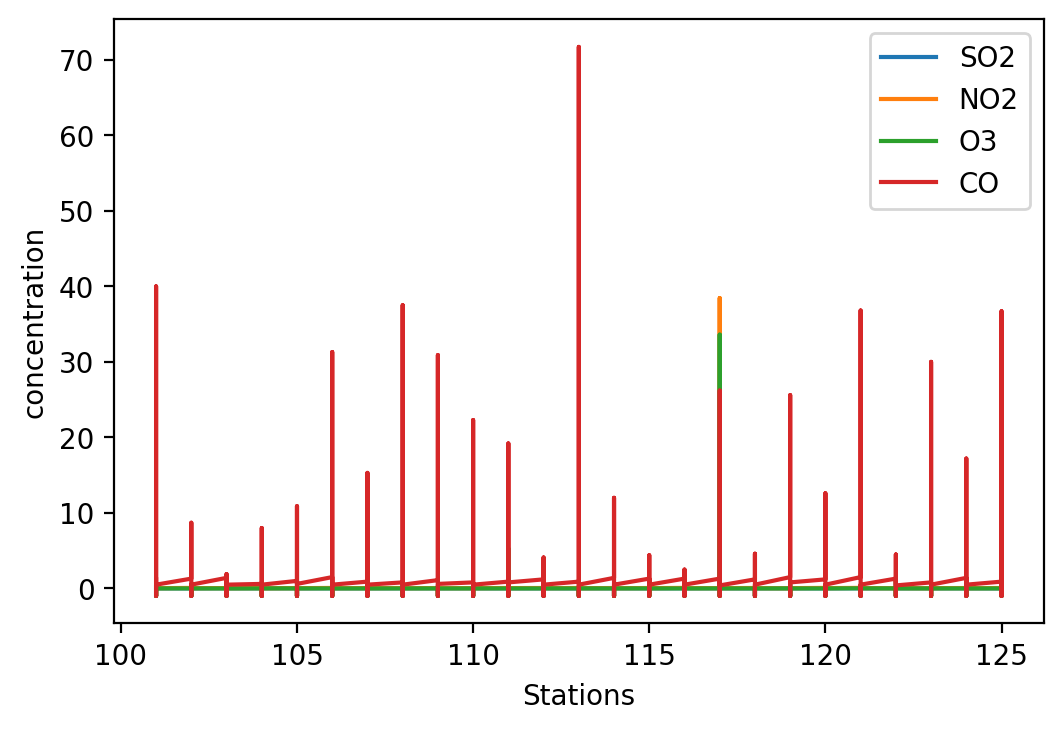

In [25]:
##Task1: Plotting gazes polluants

stations = data[['Station code']].drop_duplicates()
print(data['PM2.5'].max())
plt.figure(dpi=200)
plt.plot('Station code', 'SO2', data=data, label="SO2")
plt.plot('Station code', 'NO2', data=data ,label="NO2")
plt.plot('Station code', 'O3', data=data ,label="O3")
plt.plot('Station code', 'CO', data=data ,label="CO")
plt.xlabel('Stations')
plt.ylabel('concentration')
plt.legend()


6256.0


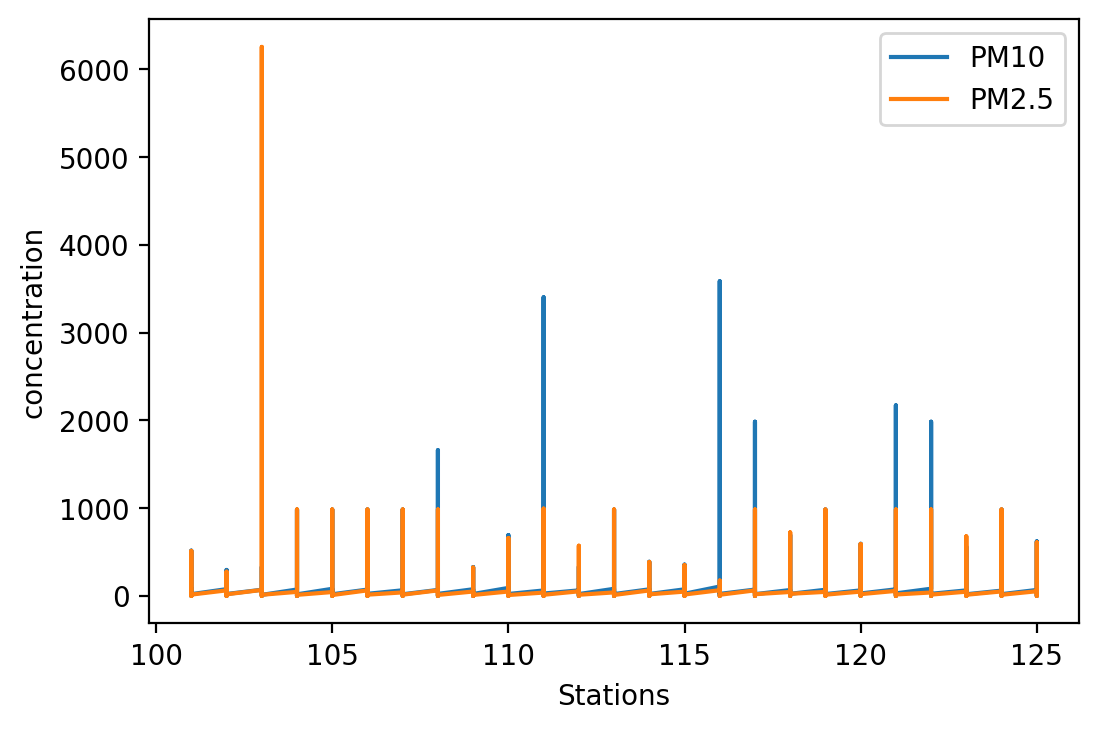

In [24]:
##Task1: Plotting particulate matter PM10 and PM2.5


plt.figure(dpi=200)
plt.plot('Station code', 'PM10', data=data, label="PM10")
plt.plot('Station code', 'PM2.5', data=data ,label="PM2.5")
plt.xlabel('Stations')
plt.ylabel('concentration')
plt.legend()



In [3]:
"""
dt = data.groupby(['Station code'])['O3'].mean()
#df.groupby('A')['B'].mean()
new_frame = dt.to_frame()
print(dt.shape)
#dt = dt[['O3','CO']]
#dt.columns
stations = data[['Station code']].drop_duplicates()
print(stations)
new_frame.head(25)
"""


,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.051,0.002,1.2,69.0,61.0
5,2017-01-01 05:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.046,0.002,1.1,70.0,61.0
6,2017-01-01 06:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.049,0.002,1.1,66.0,57.0
7,2017-01-01 07:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.045,0.002,1.0,71.0,60.0
8,2017-01-01 08:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.047,0.002,1.1,72.0,60.0
9,2017-01-01 09:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.047,0.002,1.1,74.0,63.0


In [5]:
#Histogram group by station using the mean of the gazes concentration 
dt = data.groupby(['Station code'])['NO2'].mean()
dto3 = data.groupby(['Station code'])['O3'].mean()
dt_so2 = data.groupby(['Station code'])['SO2'].mean()



"""
new_frame1 = dt.to_frame()
new_frame2 = dto3.to_frame()
print(new_frame1)
print(new_frame2)

new_frame.columns
print(new_frame.shape)
stations = data[['Station code']].drop_duplicates()
new_frame.head(25)
new_frame.plot(kind='bar')
new_frame1.plot(kind='bar')

"""





"\nprint(new_frame1)\nprint(new_frame2)\n\nnew_frame.columns\nprint(new_frame.shape)\nstations = data[['Station code']].drop_duplicates()\nnew_frame.head(25)\nnew_frame.plot(kind='bar')\nnew_frame1.plot(kind='bar')\n\n"

In [6]:


a = list(new_frame1["NO2"])
b = np.array(list(new_frame2["O3"]))

bins = np.array(list(stations['Station code']))

plt.hist(a, bins, alpha = 0.5, label='a')
plt.show()
plt.hist(b, bins, alpha = 0.5, label='b')
plt.legend(loc='upper left')

plt.show()

NameError: name 'np' is not defined

O3    0.027543
dtype: float64


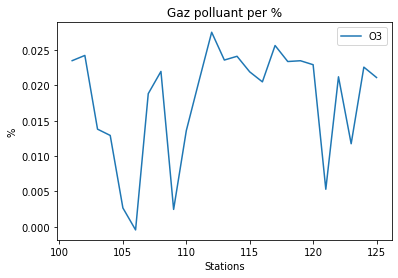

In [104]:

#Ploting

#data.plot(x="Station code", y=["SO2", "O3", "CO"])
## Create a new figure
#  A figure can contain multiple subfigures or axes

#fig = plt.figure(dpi=200) # TIP: use plt.___(dpi=300) to have a better resolution (dots per inch)

## Create a new axis (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html)

#ax = fig.add_subplot(111)


## Set the range for the X and Y axis
# Max value for Item_Outlet_Sales and Item MRP as maximum values
#ax.set_xlim(0,bigmart['Item_Outlet_Sales'].max())
#ax.set_xlim(data.columns[5:8])
#ax.set_ylim(0, data['CO'].max() )
print(new_frame.max())
#plt.plot(data['Station code'],data['O3'],  label="O3")
plt.plot(stations,new_frame,  label="O3")
## Set the X and Y label to "Item Outlet Sales" and "Item MRP" respectively
#ax.set_xlabel("Gazes")
#ax.set_ylabel("%")
plt.xlabel("Stations")
plt.ylabel("%")
## Set the title to "Sales VS Stock"
#ax.set_title("Gaz polluant per %")
plt.title("Gaz polluant per %")
#df.plot(kind='hist', y='ORIENTATION')
plt.legend()
plt.show()

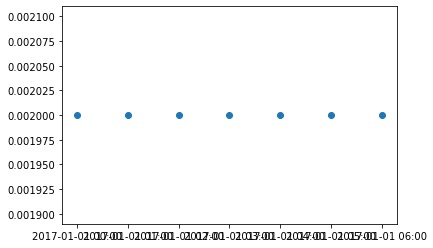

In [82]:
# Gazes concentration by dates
#data.iloc[[2]]

#print(data.index)
time = data['Measurement date'].head(7)
# con,vert to datetime
time = pd.to_datetime(time)
time = mpl_dates.DateFormatter('%d')
print(time)
timeseries = data.head(25)
plt.plot_date(data['Measurement date'].head(7), data['O3'].head(7) )